## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.<br>

 

For many incumbent operators, retaining high profitable customers is the number one business goal.<br>

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.<br>

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.<br>

## Importing required libraries

In [1]:
# Supressing the warnings first
import warnings
warnings.filterwarnings('ignore')

# import libraries
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold

from imblearn.metrics import sensitivity_specificity_support

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
# Loading DataSet and printing few rows
df = pd.read_csv("../telecom_churn_data.csv")
df.head(7)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,4,

In [3]:
# types of features
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [4]:
# looking at descriptive statistics
df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [5]:
# keepeing a backup backup of data
dfBackUp = df.copy()

In [6]:
# making list of different types of columns
id_colms = ['mobile_number', 'circle_id']

date_colms = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6',
             'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7',
             'date_of_last_rech_data_8','date_of_last_rech_data_9']

cat_colms =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

num_colms = [column for column in df.columns if column not in id_colms + date_colms + cat_colms]

# print the number of columns in each list
print(f" No. of ID cols: {len(id_colms)}\n No. of Date cols:{len(date_colms)}\n No. of Numeric cols:{len(num_colms)}\n No. of Category cols:{len(cat_colms)}")

 No. of ID cols: 2
 No. of Date cols:12
 No. of Numeric cols:204
 No. of Category cols:8


In [7]:
#creating a dataframe for diffent metrics.
con_df = pd.DataFrame(np.array([1]),columns=['Sl. No'])

## Handling missing values

In [8]:
# Inspecting percentage of Null values for each column
df.isnull().sum()*100/len(df)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

### i) Imputation with zeroes

In [9]:
#making list of a recharge colums where minimum value is 1
lst_1=[]
for item in df[num_colms]:
    if df[item].min()==1:
        lst_1.append(item)
lst_1 

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_9']

In the above list all columns are about recharge colums so we need not remove any features.

In [10]:
df[lst_1].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,192.734315
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,188.400286
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4061.000000


In [11]:
# It is observed that the both recharge date and the recharge value are missing which indicates the customer didn't recharge
df[["total_rech_data_6", "date_of_last_rech_data_6"]][df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull()].head()

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN



In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.

In [12]:
# drop all columns related to id and date
df = df.drop(id_colms + date_colms, axis=1)
df.shape

(99999, 212)

In [13]:
# list for imputing null values with 0 for all recharge all columns
list_zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [14]:
# imputing null values with 0
df[list_zero_impute] = df[list_zero_impute].apply(lambda x: x.fillna(0))

In [15]:
# checking if values are imputed correctly
print(df[list_zero_impute].isnull().sum()*100/len(df))

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


### ii) Replace NaN values in categorical variables<br>

In [16]:
# replacing null values with '-1' in categorical columns where '-1' will be a new category.
df[cat_colms] = df[cat_colms].apply(lambda x: x.fillna(-1))

In [17]:
# null value
print(df[cat_colms].isnull().sum()*100/len(df))

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


### iii) Drop variables with more than a given threshold of missing values

In [18]:
# making list of columns which got more than 70% of null values
include_cols = list(df.apply(lambda column: True if column.isnull().sum()/len(df) >= 0.7 else False))

# New Dataframe for represnting features which got null values more than .7
drop_null = pd.DataFrame({'features':df.columns , 'include': include_cols})
# Creating List of Feature
null_lst=drop_null.loc[drop_null.include == True,:].features.tolist()
null_lst


['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [19]:
# drop the columns selected
df.drop(null_lst, axis=1, inplace=True)
df.shape

(99999, 196)

In [20]:
#null_cols2 =[x for x in df.columns if df[x].isnull().sum()/len(df)>0]
#print(len(null_cols2))
#df[null_cols2].isnull().sum()

#df[null_cols2].dtypes
#df[null_cols2].dtypes

### iv) Imputation with Median

In [22]:
missing_cols = df.columns[df.isnull().sum()>0]
missing_cols    

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=119)

In [23]:
df = df.fillna(df.median())

In [24]:
df.shape

(99999, 196)

## filter high-value customers
- Finding total data recharge amount

In [25]:
# let's add a new derived variable total recharge amount for June and July (number of recharges * average recharge amount)
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [26]:
# checking null values
print(any(df.total_rech_amt_6.isna()))
print(any(df.total_rech_amt_7.isna()))

False
False


In [27]:
# Total recharge amount for June and July 
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [28]:
# average recharge done by customer in June and July
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [29]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.0

In [30]:
df[['av_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].head()

,av_amt_data_6_7,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7
0,559.0,252.0,252.0,614.0,504.0
1,306.0,0.0,154.0,74.0,538.0
2,241.5,0.0,0.0,168.0,315.0
3,270.0,0.0,0.0,230.0,310.0
4,301.0,56.0,0.0,252.0,350.0


In [31]:
# 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [32]:
# Extracting High value customers where total average recharge amount for good phase > 70th percentile
df_filtered = df.loc[df.av_amt_data_6_7 > df.av_amt_data_6_7.quantile(0.7), :]
df_filtered = df_filtered.reset_index(drop=True)
df_filtered.shape

(29953, 201)

#### There are 29953  customers who have recharge value of more than or equal to the that of the 70th percentile customer.

In [33]:
# delete variables created to filter high-value customers
df_filtered = df_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
df_filtered.shape

(29953, 196)

## Tagging Churn

In [34]:
#  total incoming and outgoing minutes of usage
df_filtered['total_calls_mou_9'] = df_filtered.total_ic_mou_9 + df_filtered.total_og_mou_9

In [35]:
#     2g and 3g data consumption
df_filtered['total_internet_mb_9'] =  df_filtered.vol_2g_mb_9 + df_filtered.vol_3g_mb_9

In [36]:
# Those who have not used either calls or internet in  September are churned customers
# Let's denote 0 as not churn and  1 as churn
df_filtered['churn'] = df_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [37]:
df_filtered[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]
# delete derived variables
df_filtered = df_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [38]:
# change data type to category
df_filtered.churn = df_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(df_filtered.churn.value_counts()*100/df_filtered.shape[0])

Churn Ratio:
0    91.877274
1     8.122726
Name: churn, dtype: float64


#### We see that approx. 8.1% of high value customers have churned

In [39]:
#Finding difference variable as the difference between 8th month and the average of 6th and 7th month.
df_filtered['arpu_difference'] = df_filtered.arpu_8 - ((df_filtered.arpu_6 + df_filtered.arpu_7)/2)
df_filtered['onnet_mou_difference'] = df_filtered.onnet_mou_8 - ((df_filtered.onnet_mou_6 + df_filtered.onnet_mou_7)/2)
df_filtered['offnet_mou_difference'] = df_filtered.offnet_mou_8 - ((df_filtered.offnet_mou_6 + df_filtered.offnet_mou_7)/2)
df_filtered['roam_ic_mou_difference'] = df_filtered.roam_ic_mou_8 - ((df_filtered.roam_ic_mou_6 + df_filtered.roam_ic_mou_7)/2)
df_filtered['roam_og_mou_difference'] = df_filtered.roam_og_mou_8 - ((df_filtered.roam_og_mou_6 + df_filtered.roam_og_mou_7)/2)
df_filtered['loc_og_mou_difference'] = df_filtered.loc_og_mou_8 - ((df_filtered.loc_og_mou_6 + df_filtered.loc_og_mou_7)/2)
df_filtered['std_og_mou_difference'] = df_filtered.std_og_mou_8 - ((df_filtered.std_og_mou_6 + df_filtered.std_og_mou_7)/2)
df_filtered['isd_og_mou_difference'] = df_filtered.isd_og_mou_8 - ((df_filtered.isd_og_mou_6 + df_filtered.isd_og_mou_7)/2)
df_filtered['spl_og_mou_difference'] = df_filtered.spl_og_mou_8 - ((df_filtered.spl_og_mou_6 + df_filtered.spl_og_mou_7)/2)
df_filtered['total_og_mou_difference'] = df_filtered.total_og_mou_8 - ((df_filtered.total_og_mou_6 + df_filtered.total_og_mou_7)/2)
df_filtered['loc_ic_mou_difference'] = df_filtered.loc_ic_mou_8 - ((df_filtered.loc_ic_mou_6 + df_filtered.loc_ic_mou_7)/2)
df_filtered['std_ic_mou_difference'] = df_filtered.std_ic_mou_8 - ((df_filtered.std_ic_mou_6 + df_filtered.std_ic_mou_7)/2)
df_filtered['isd_ic_mou_difference'] = df_filtered.isd_ic_mou_8 - ((df_filtered.isd_ic_mou_6 + df_filtered.isd_ic_mou_7)/2)
df_filtered['spl_ic_mou_difference'] = df_filtered.spl_ic_mou_8 - ((df_filtered.spl_ic_mou_6 + df_filtered.spl_ic_mou_7)/2)
df_filtered['total_ic_mou_difference'] = df_filtered.total_ic_mou_8 - ((df_filtered.total_ic_mou_6 + df_filtered.total_ic_mou_7)/2)
df_filtered['total_rech_num_difference'] = df_filtered.total_rech_num_8 - ((df_filtered.total_rech_num_6 + df_filtered.total_rech_num_7)/2)
df_filtered['total_rech_amt_difference'] = df_filtered.total_rech_amt_8 - ((df_filtered.total_rech_amt_6 + df_filtered.total_rech_amt_7)/2)
df_filtered['max_rech_amt_difference'] = df_filtered.max_rech_amt_8 - ((df_filtered.max_rech_amt_6 + df_filtered.max_rech_amt_7)/2)
df_filtered['total_rech_data_difference'] = df_filtered.total_rech_data_8 - ((df_filtered.total_rech_data_6 + df_filtered.total_rech_data_7)/2)
df_filtered['max_rech_data_difference'] = df_filtered.max_rech_data_8 - ((df_filtered.max_rech_data_6 + df_filtered.max_rech_data_7)/2)
df_filtered['av_rech_amt_data_difference'] = df_filtered.av_rech_amt_data_8 - ((df_filtered.av_rech_amt_data_6 + df_filtered.av_rech_amt_data_7)/2)
df_filtered['vol_2g_mb_difference'] = df_filtered.vol_2g_mb_8 - ((df_filtered.vol_2g_mb_6 + df_filtered.vol_2g_mb_7)/2)
df_filtered['vol_3g_mb_difference'] = df_filtered.vol_3g_mb_8 - ((df_filtered.vol_3g_mb_6 + df_filtered.vol_3g_mb_7)/2)

In [40]:
df_filtered['total_og_mou_difference'].describe()

count    29953.000000
mean       -67.461292
std        502.520398
min      -7213.410000
25%       -167.865000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_difference, dtype: float64

In [41]:
# delete all variables relating to 9th month
df_filtered = df_filtered.filter(regex='[^9]$', axis=1)
df_filtered.shape

(29953, 173)

In [42]:
# extract all names that end with 9
col_9 = df.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_colms = [col for col in cat_colms if col not in col_9]
cat_colms.append('churn')
num_colms = [col for col in df_filtered.columns if col not in cat_colms]

In [43]:
# change column types
df_filtered[num_colms] = df_filtered[num_colms].apply(pd.to_numeric)
df_filtered[cat_colms] = df_filtered[cat_colms].apply(lambda column: column.astype("category"), axis=0)

In [44]:
df_filtered.shape

(29953, 173)

# Data Visualization

## Univariate EDA

In [45]:
# change columns types
df_filtered[num_colms] = df_filtered[num_colms].apply(pd.to_numeric)
df_filtered[cat_colms] = df_filtered[cat_colms].apply(lambda column: column.astype("category"), axis=0)

In [46]:
lst=["arpu_6","loc_og_t2o_mou","std_og_t2o_mou","onnet_mou_8","onnet_mou_8","offnet_mou_9"]
dfCol=df[lst] 

def perColumnDistribution(lst):
  row=int(math.ceil(len(lst)/2))
  ax=0
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(10,12))
  for xx in lst:
    ax=ax+1
    plt.subplot(row,3, ax)
    gg=sns.distplot(df[xx])
    
    plt.tight_layout()
  plt.show()  


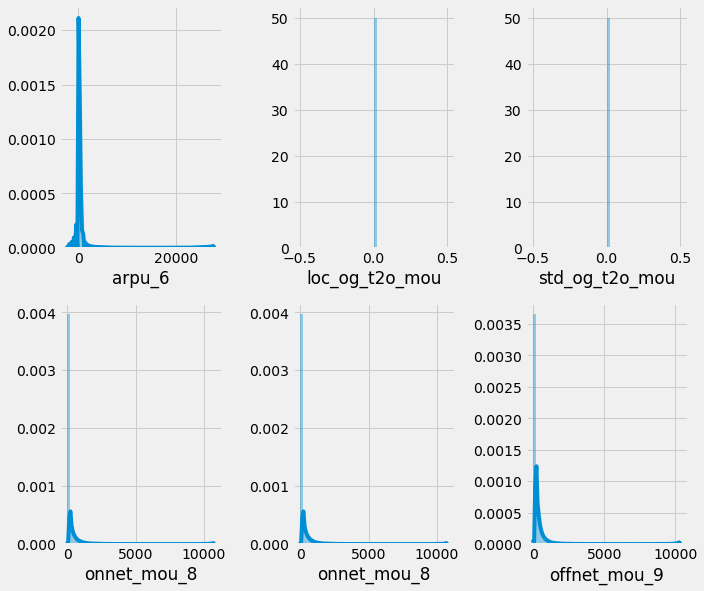

In [47]:
perColumnDistribution(lst)

Variables are very skewed towards the right.

## Bivariate EDA

In [48]:
lst_box_1=['aon','sep_vbc_3g','spl_og_mou_8']
dfCol=df_filtered[lst_box_1] 

def box_plot(lst, xx):
  row=int(math.ceil(len(lst)/2))
  ax=0
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(16,18))
  for yy in lst:
    ax=ax+1
    plt.subplot(row,3, ax)
    gg=sns.boxplot(data=df_filtered, x=xx, y=yy)
    plt.tight_layout()
  plt.show() 

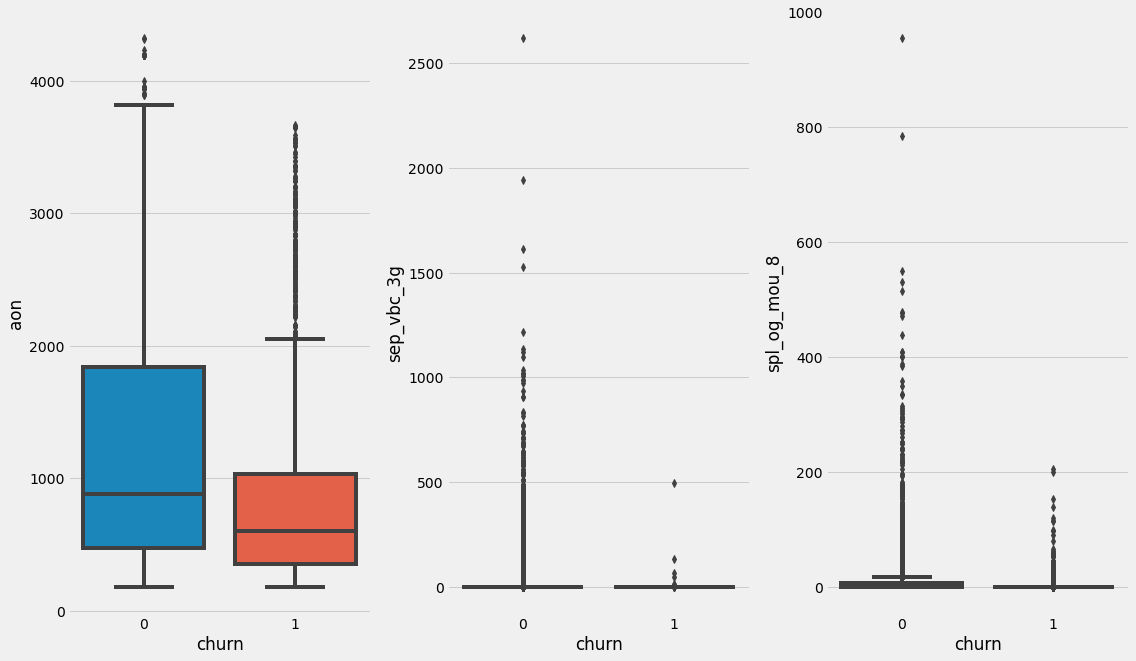

In [49]:
box_plot(lst_box_1, df_filtered.churn)

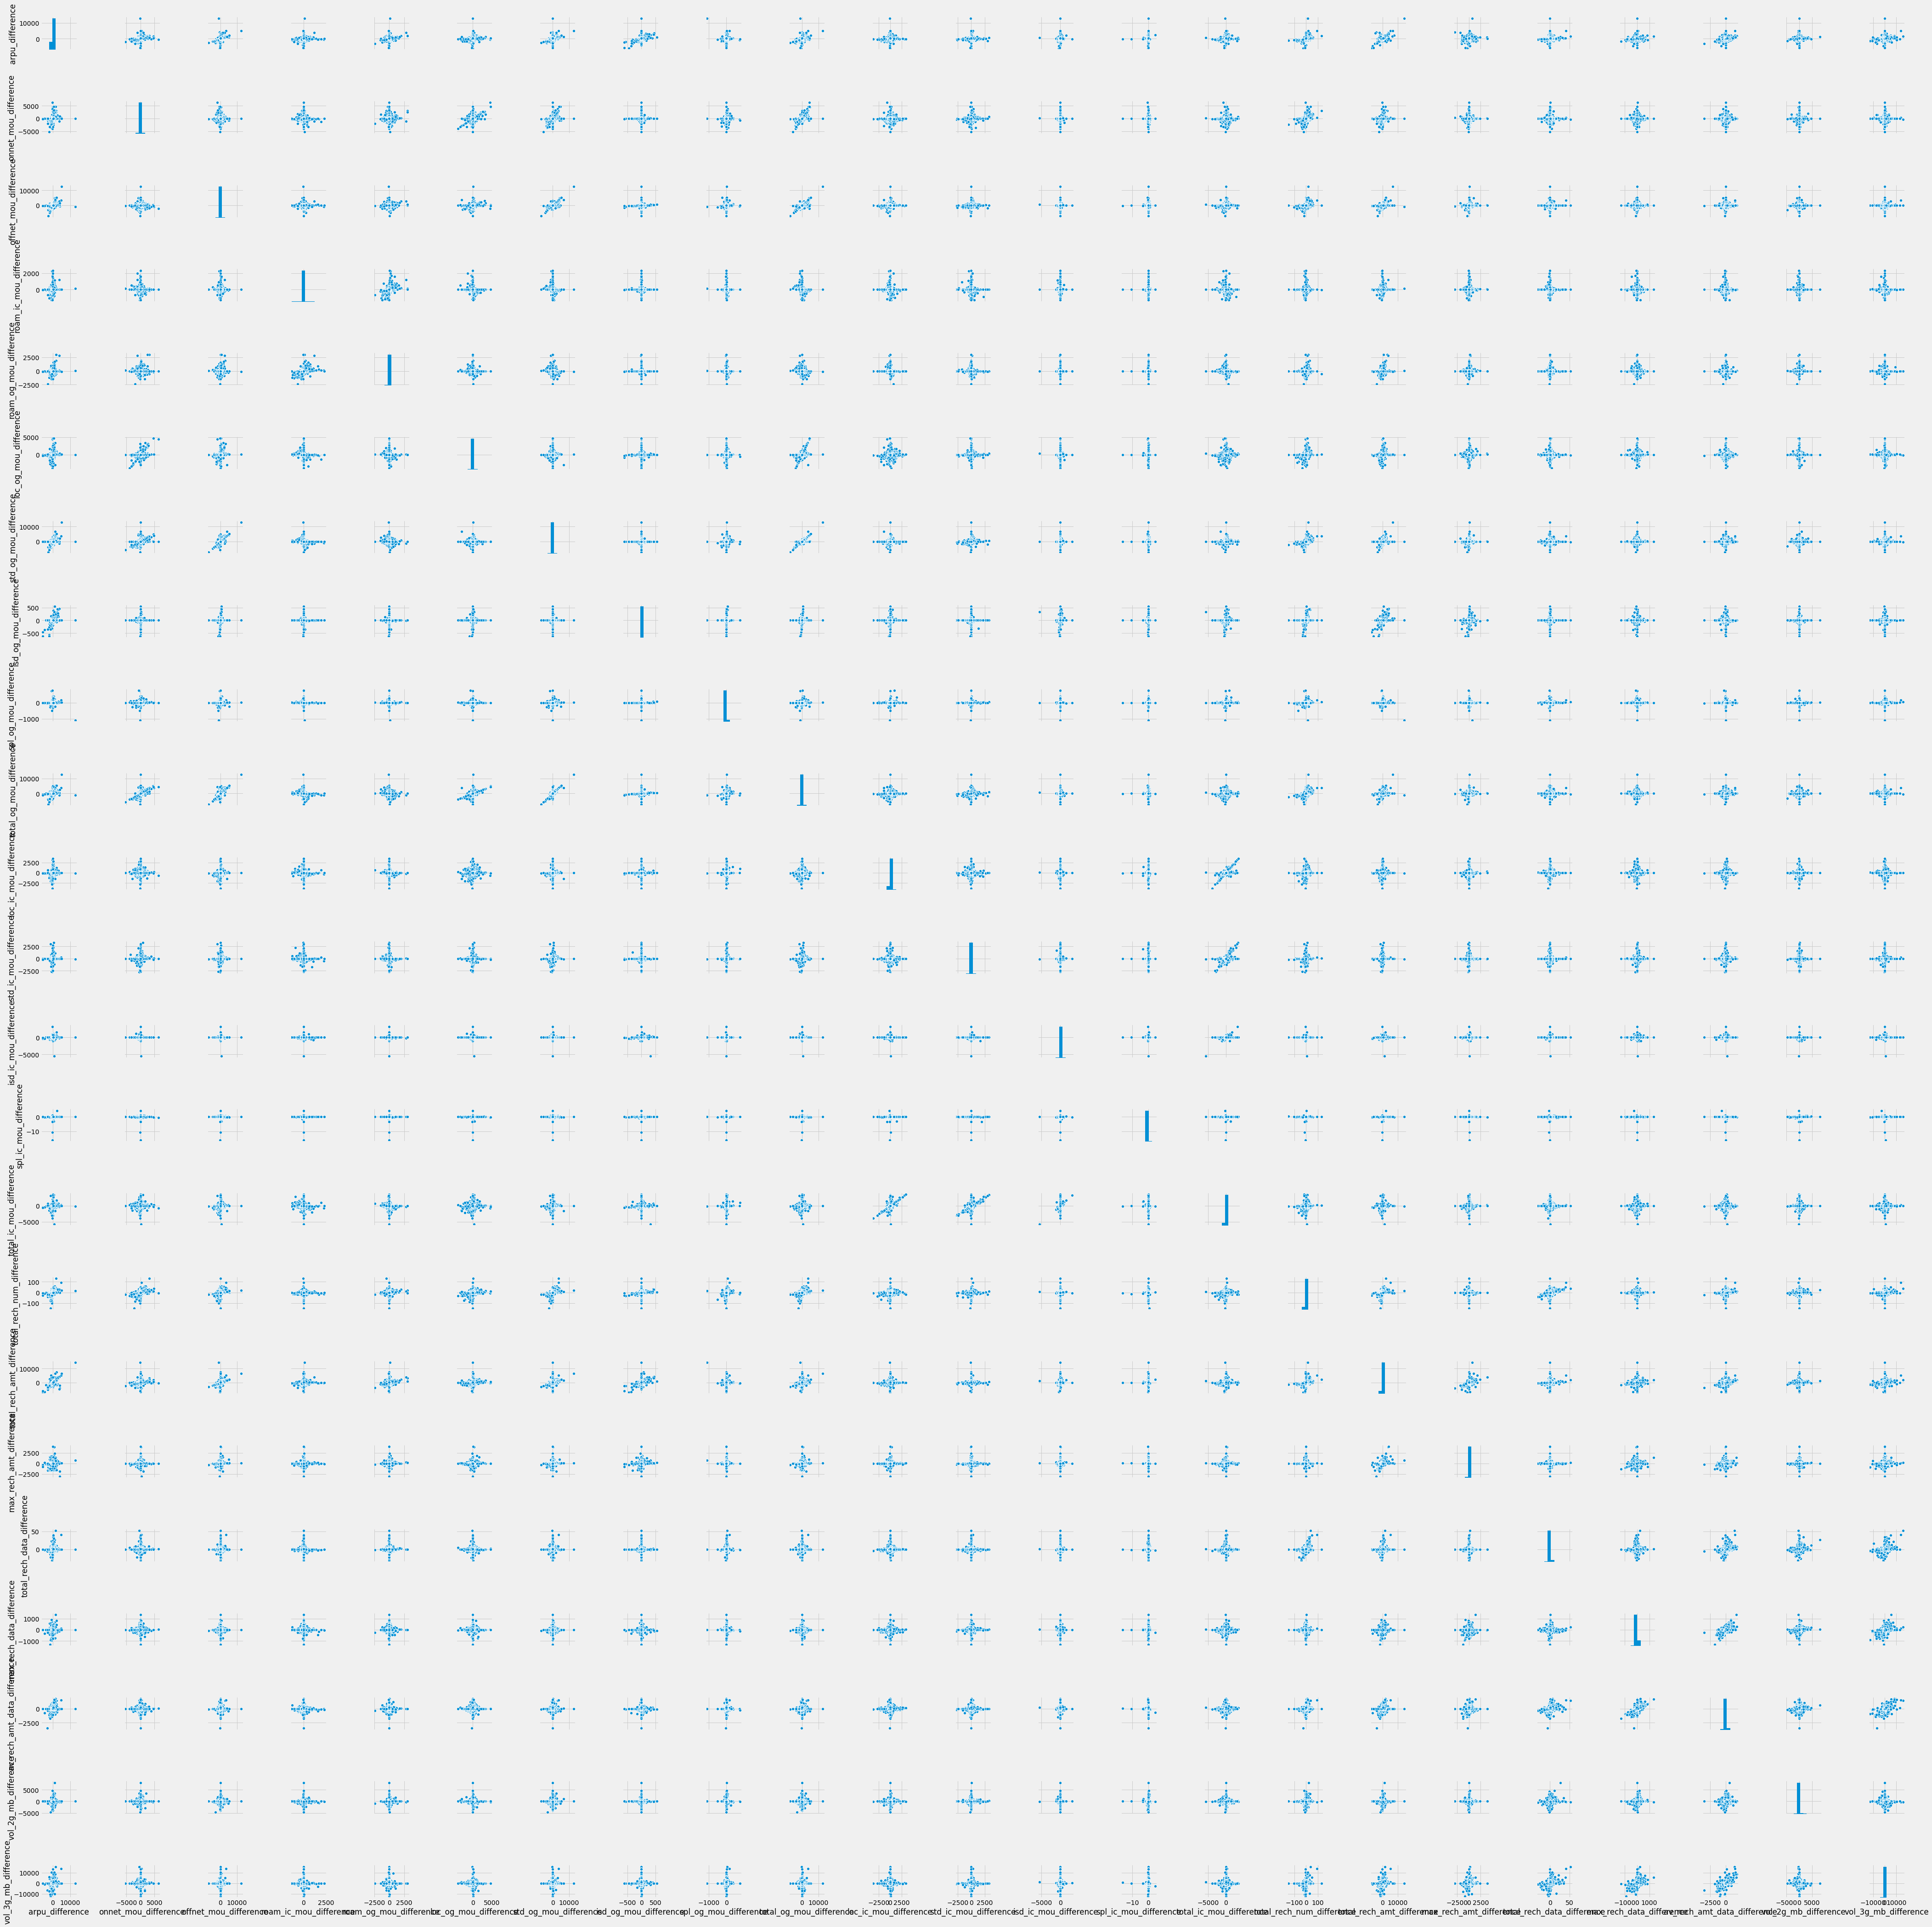

In [50]:
### EDA on derived variables.
# the commonly used alias for seaborn is sns
import seaborn as sns

sns.pairplot(df_filtered[[x for x in df_filtered.columns if 'diff' in x]])
plt.show()

## Handling Class Imbalance using SMOTE

In [139]:
df_filtered['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

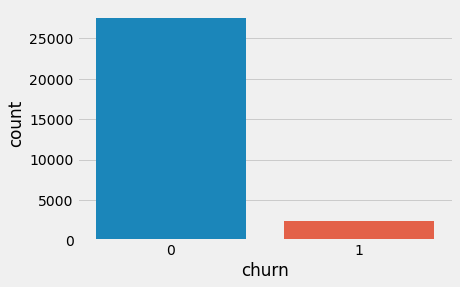

In [142]:
sns.countplot(df_filtered['churn'])

In [144]:
sm = SMOTE(random_state=42, sampling_strategy=0.8)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [149]:
y_train.value_counts()

0    19215
1    15372
Name: churn, dtype: int64

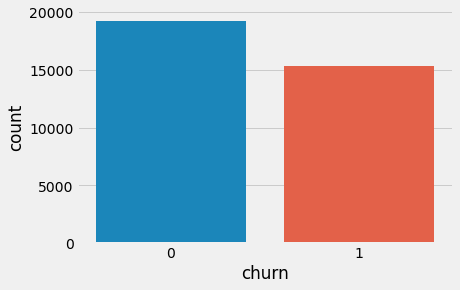

In [150]:
sns.countplot(y_train)

## Treating outliers in all numeric variables with 3rd Zscore Technique

In [51]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [52]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [53]:
# cap outliers in the numeric columns
df_filtered[num_colms] = df_filtered[num_colms].apply(cap_outliers, axis=0)

In [54]:
df_filtered.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_difference,onnet_mou_difference,offnet_mou_difference,roam_ic_mou_difference,roam_og_mou_difference,loc_og_mou_difference,std_og_mou_difference,isd_og_mou_difference,spl_og_mou_difference,total_og_mou_difference,loc_ic_mou_difference,std_ic_mou_difference,isd_ic_mou_difference,spl_ic_mou_difference,total_ic_mou_difference,total_rech_num_difference,total_rech_amt_difference,max_rech_amt_difference,total_rech_data_difference,max_rech_data_difference,av_rech_amt_data_difference,vol_2g_mb_difference,vol_3g_mb_difference
count,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.0000

# Building Models

## Preprocessing Step

In [55]:
# changing churn to numeric
df_filtered['churn'] = pd.to_numeric(df_filtered['churn'])

In [56]:
X = df_filtered.drop("churn", axis = 1)
y = df_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

## PCA

In [58]:
(df_filtered.isnull().sum()*100/df_filtered.shape[0]).sort_values(ascending=False)

vol_3g_mb_difference           0.0
spl_og_mou_8                   0.0
loc_ic_t2t_mou_7               0.0
loc_ic_t2t_mou_6               0.0
total_og_mou_8                 0.0
total_og_mou_7                 0.0
total_og_mou_6                 0.0
og_others_8                    0.0
og_others_7                    0.0
og_others_6                    0.0
spl_og_mou_7                   0.0
loc_ic_t2m_mou_6               0.0
spl_og_mou_6                   0.0
isd_og_mou_8                   0.0
isd_og_mou_7                   0.0
isd_og_mou_6                   0.0
std_og_mou_8                   0.0
std_og_mou_7                   0.0
std_og_mou_6                   0.0
std_og_t2c_mou_8               0.0
loc_ic_t2t_mou_8               0.0
loc_ic_t2m_mou_7               0.0
std_ic_mou_7                   0.0
std_ic_t2m_mou_6               0.0
std_ic_t2o_mou_8               0.0
std_ic_t2o_mou_7               0.0
std_ic_t2o_mou_6               0.0
std_ic_t2f_mou_8               0.0
std_ic_t2f_mou_7    

In [59]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [60]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [61]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.52
1       20.98
2       26.79
3       31.66
4       35.73
5       39.42
6       42.16
7       44.76
8       47.06
9       49.21
10      51.21
11      53.13
12      54.93
13      56.64
14      58.24
15      59.70
16      61.06
17      62.40
18      63.73
19      65.04
20      66.24
21      67.41
22      68.52
23      69.60
24      70.63
25      71.62
26      72.57
27      73.47
28      74.37
29      75.26
30      76.12
31      76.94
32      77.75
33      78.55
34      79.30
35      80.03
36      80.75
37      81.45
38      82.10
39      82.73
40      83.35
41      83.91
42      84.45
43      84.98
44      85.50
45      86.01
46      86.50
47      86.98
48      87.45
49      87.89
50      88.29
51      88.69
52      89.06
53      89.43
54      89.78
55      90.13
56      90.47
57      90.80
58      91.13
59      91.46
60      91.76
61      92.07
62      92.36
63      92.64
64      92.91
65      93.18
66      93.44
67      93.70
68      93.94
69      94.18
70      94.40
71    

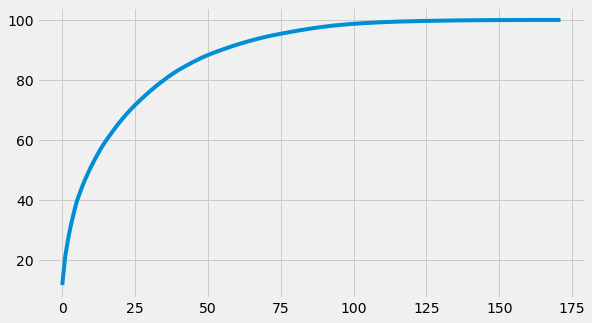

In [62]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## PCA with Logistic Regression

In [63]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),("pca", PCA(n_components=PCA_VARS)),("logistic", LogisticRegression(class_weight='balanced'))]
pipeline = Pipeline(steps)

In [64]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8128561253561254

In [65]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5629 1252]
 [ 101  507]]
Sensitivity: 	0.83
Specificity: 	0.82
AUC:    	 0.9


In [66]:
ii=0
con_df.loc[ii,'Model']="PCA + Logistic Regression"
con_df.loc[ii,'accuracy']=metrics.accuracy_score(y_test, y_pred)
con_df.loc[ii,'precision']=metrics.precision_score(y_test, y_pred)
con_df.loc[ii,'recall']=metrics.recall_score(y_test, y_pred)
#con_df.loc[ii,'F1_Score'] = 2* con_df.loc[ii,'precision'] * con_df.loc[ii,'recall']/ (con_df.loc[ii,'precision'] + con_df.loc[ii,'recall'])
con_df.loc[ii,'hamming_loss']=metrics.hamming_loss(y_test, y_pred)
con_df.loc[ii,'log_loss']=metrics.log_loss(y_test, y_pred)
con_df.loc[ii,'zero_one_loss']=metrics.zero_one_loss(y_test, y_pred)
con_df.loc[ii,'AUC&ROC']=metrics.roc_auc_score(y_test, y_pred)
con_df.loc[ii,'matthews_corrcoef']= metrics.matthews_corrcoef(y_test, y_pred)

con_df

,Sl. No,Model,accuracy,precision,recall,hamming_loss,log_loss,zero_one_loss,AUC&ROC,matthews_corrcoef
0,1,PCA + Logistic Regression,0.819335,0.288232,0.833882,0.180665,6.240081,0.180665,0.825966,0.420019


In [67]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

# Hyperparameter tuning - PCA and Logistic Regression

In [68]:
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

In [69]:
steps = [("scaler", StandardScaler()),("pca", PCA()),("logistic", logistic)]

In [70]:
# Compiling them
pca_logistic = Pipeline(steps)

In [71]:
param = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.4, 0.5], 'logistic__penalty': ['l1', 'l2']}

In [72]:
# 5Folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)

In [73]:
# Model
model = GridSearchCV(estimator = pca_logistic, cv = fold, param_grid = param, scoring='roc_auc', n_jobs=-1, verbose=1)

In [74]:
# fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.4, 0.5],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [75]:
# cross validation
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.733721,0.057975,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,1.999653,0.069735,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
2,1.933169,0.061115,0.163444,0.019749,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.884894,0.887378,0.880053,0.895179,0.893601,0.888221,0.005583,5
3,2.419119,0.118219,0.163681,0.016128,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.885945,0.891014,0.880096,0.897606,0.900276,0.890987,0.007405,3
4,1.667072,0.043655,0.000000,0.000000,0.4,l1,60,"{'logistic__C': 0.4, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,1.931617,0.048327,0.000000,0.000000,0.4,l1,80,"{'logistic__C': 0.4, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
6,1.824797,0.054086,0.158748,0.011423,0.4,l2,60,"{'logistic__C': 0.4, 'logistic__penalty': 'l2'...",0.885430,0.886778,0.880716,0.895246,0.894295,0.888493,0.005515,4
7,2.250115,0.098932,0.158935,0.006497,0.4,l2,80,"{'logistic__C': 0.4, 'logistic__penalty': 'l2'...",0.886041,0.890974,0.880366,0.897763,0.900175,0.891064,0.007315,1
8,1.610852,0.054036,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
9,2.078901,0.113112,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [76]:
# best hyperparameters score
model.best_score_

0.8910637097599862

In [77]:
# best hyperparameters
model.best_params_

{'logistic__C': 0.4, 'logistic__penalty': 'l2', 'pca__n_components': 80}

In [78]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),3))

[[5869 1012]
 [ 113  495]]
Sensitivity: 	0.81
Specificity: 	0.85
AUC:    	 0.9


In [79]:
ii=1
con_df.loc[ii,'Sl. No']=ii+1
con_df.loc[ii,'Model']="PCA + Logistic Regression + Hyperparameter."
con_df.loc[ii,'accuracy']=metrics.accuracy_score(y_test, y_pred)
con_df.loc[ii,'precision']=metrics.precision_score(y_test, y_pred)
#con_df.loc[ii,'F1_Score'] = 2* con_df.loc[ii,'precision'] * con_df.loc[ii,'recall']/ (con_df.loc[ii,'precision'] + con_df.loc[ii,'recall'])
con_df.loc[ii,'recall']=metrics.recall_score(y_test, y_pred)
con_df.loc[ii,'hamming_loss']=metrics.hamming_loss(y_test, y_pred)
con_df.loc[ii,'log_loss']=metrics.log_loss(y_test, y_pred)
con_df.loc[ii,'zero_one_loss']=metrics.zero_one_loss(y_test, y_pred)
con_df.loc[ii,'AUC&ROC']=metrics.roc_auc_score(y_test, y_pred)
con_df.loc[ii,'matthews_corrcoef']= metrics.matthews_corrcoef(y_test, y_pred)
 
con_df

,Sl. No,Model,accuracy,precision,recall,hamming_loss,log_loss,zero_one_loss,AUC&ROC,matthews_corrcoef
0,1.0,PCA + Logistic Regression,0.819335,0.288232,0.833882,0.180665,6.240081,0.180665,0.825966,0.420019
1,2.0,PCA + Logistic Regression + Hyperparameter.,0.849780,0.328467,0.814145,0.150220,5.188534,0.150220,0.833537,0.454434


# SVM

In [80]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [81]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[6847,   34],
       [ 483,  125]], dtype=int64)

In [82]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9309654159433837
precision 0.7861635220125787
recall 0.20559210526315788


In [83]:
ii=2
con_df.loc[ii,'Sl. No']=ii+1
con_df.loc[ii,'Model']="Support vector Machine."
con_df.loc[ii,'accuracy']=metrics.accuracy_score(y_test, y_pred)
con_df.loc[ii,'precision']=metrics.precision_score(y_test, y_pred)
con_df.loc[ii,'recall']=metrics.recall_score(y_test, y_pred)
con_df.loc[ii,'hamming_loss']=metrics.hamming_loss(y_test, y_pred)
con_df.loc[ii,'log_loss']=metrics.log_loss(y_test, y_pred)
con_df.loc[ii,'zero_one_loss']=metrics.zero_one_loss(y_test, y_pred)
con_df.loc[ii,'AUC&ROC']=metrics.roc_auc_score(y_test, y_pred)
con_df.loc[ii,'matthews_corrcoef']= metrics.matthews_corrcoef(y_test, y_pred)
 
con_df

,Sl. No,Model,accuracy,precision,recall,hamming_loss,log_loss,zero_one_loss,AUC&ROC,matthews_corrcoef
0,1.0,PCA + Logistic Regression,0.819335,0.288232,0.833882,0.180665,6.240081,0.180665,0.825966,0.420019
1,2.0,PCA + Logistic Regression + Hyperparameter.,0.849780,0.328467,0.814145,0.150220,5.188534,0.150220,0.833537,0.454434
2,3.0,Support vector Machine.,0.930965,0.786164,0.205592,0.069035,2.384374,0.069035,0.600325,0.380162


# Random Forest

In [110]:
frt = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

In [111]:
param = {"criterion": ['gini', 'entropy'], "max_features": [1]}

In [112]:
# creating folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)

In [115]:
# Grid search
model = GridSearchCV(estimator=frt, cv=fold, param_grid=param, scoring='roc_auc', n_jobs=-1, verbose=1)

In [116]:
# fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_features': [1]},
             scoring='roc_auc', verbose=1)

In [117]:
# best hyperparameters score
model.best_score_

0.9113835541969812

In [118]:
# best hyperparameters
model.best_params_

{'criterion': 'entropy', 'max_features': 1}

In [119]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8238   67]
 [ 430  251]]
Sensitivity: 	0.37
Specificity: 	0.99
AUC:    	 0.92


#### Looks like random forest is overfitting and the sensitivity is very low. So going with logistic and PCA

In [123]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))
rand_frt_model = RandomForestClassifier(n_estimators=100, max_features = max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=20, verbose=1)

In [124]:
# fiting the model
rand_frt_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.6s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=20, verbose=1)

In [125]:
# checking OOB score
rand_frt_model.oob_score_

0.9410502217770783

In [126]:
# predicting churn on test data
y_pred = rand_frt_model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = rand_frt_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8214   91]
 [ 389  292]]
Sensitivity: 	0.43
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [128]:
# predictors
feature = df_filtered.drop('churn', axis=1).columns

In [129]:
# feature_importance
importance = rand_frt_model.feature_importances_

In [130]:
# creating the dataframe
feature_imp = pd.DataFrame({'variables': feature, 'importance_percentage': importance*100})
feature_imp = feature_imp[['variables', 'importance_percentage']]

In [131]:
# sorting the features
feature_imp = feature_imp.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_imp.importance_percentage.sum())
feature_imp

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,total_ic_mou_8,5.736983
1,last_day_rch_amt_8,4.605061
2,arpu_8,4.312725
3,arpu_difference,3.820299
4,total_og_mou_8,3.277332
5,total_rech_amt_8,3.222834
6,loc_ic_t2m_mou_8,2.283951
7,total_rech_amt_difference,2.219192
8,loc_ic_mou_8,2.082001
9,loc_og_t2m_mou_8,2.028898


In [132]:
# extract top 'n' features
top_features = feature_imp.variables[0:50]

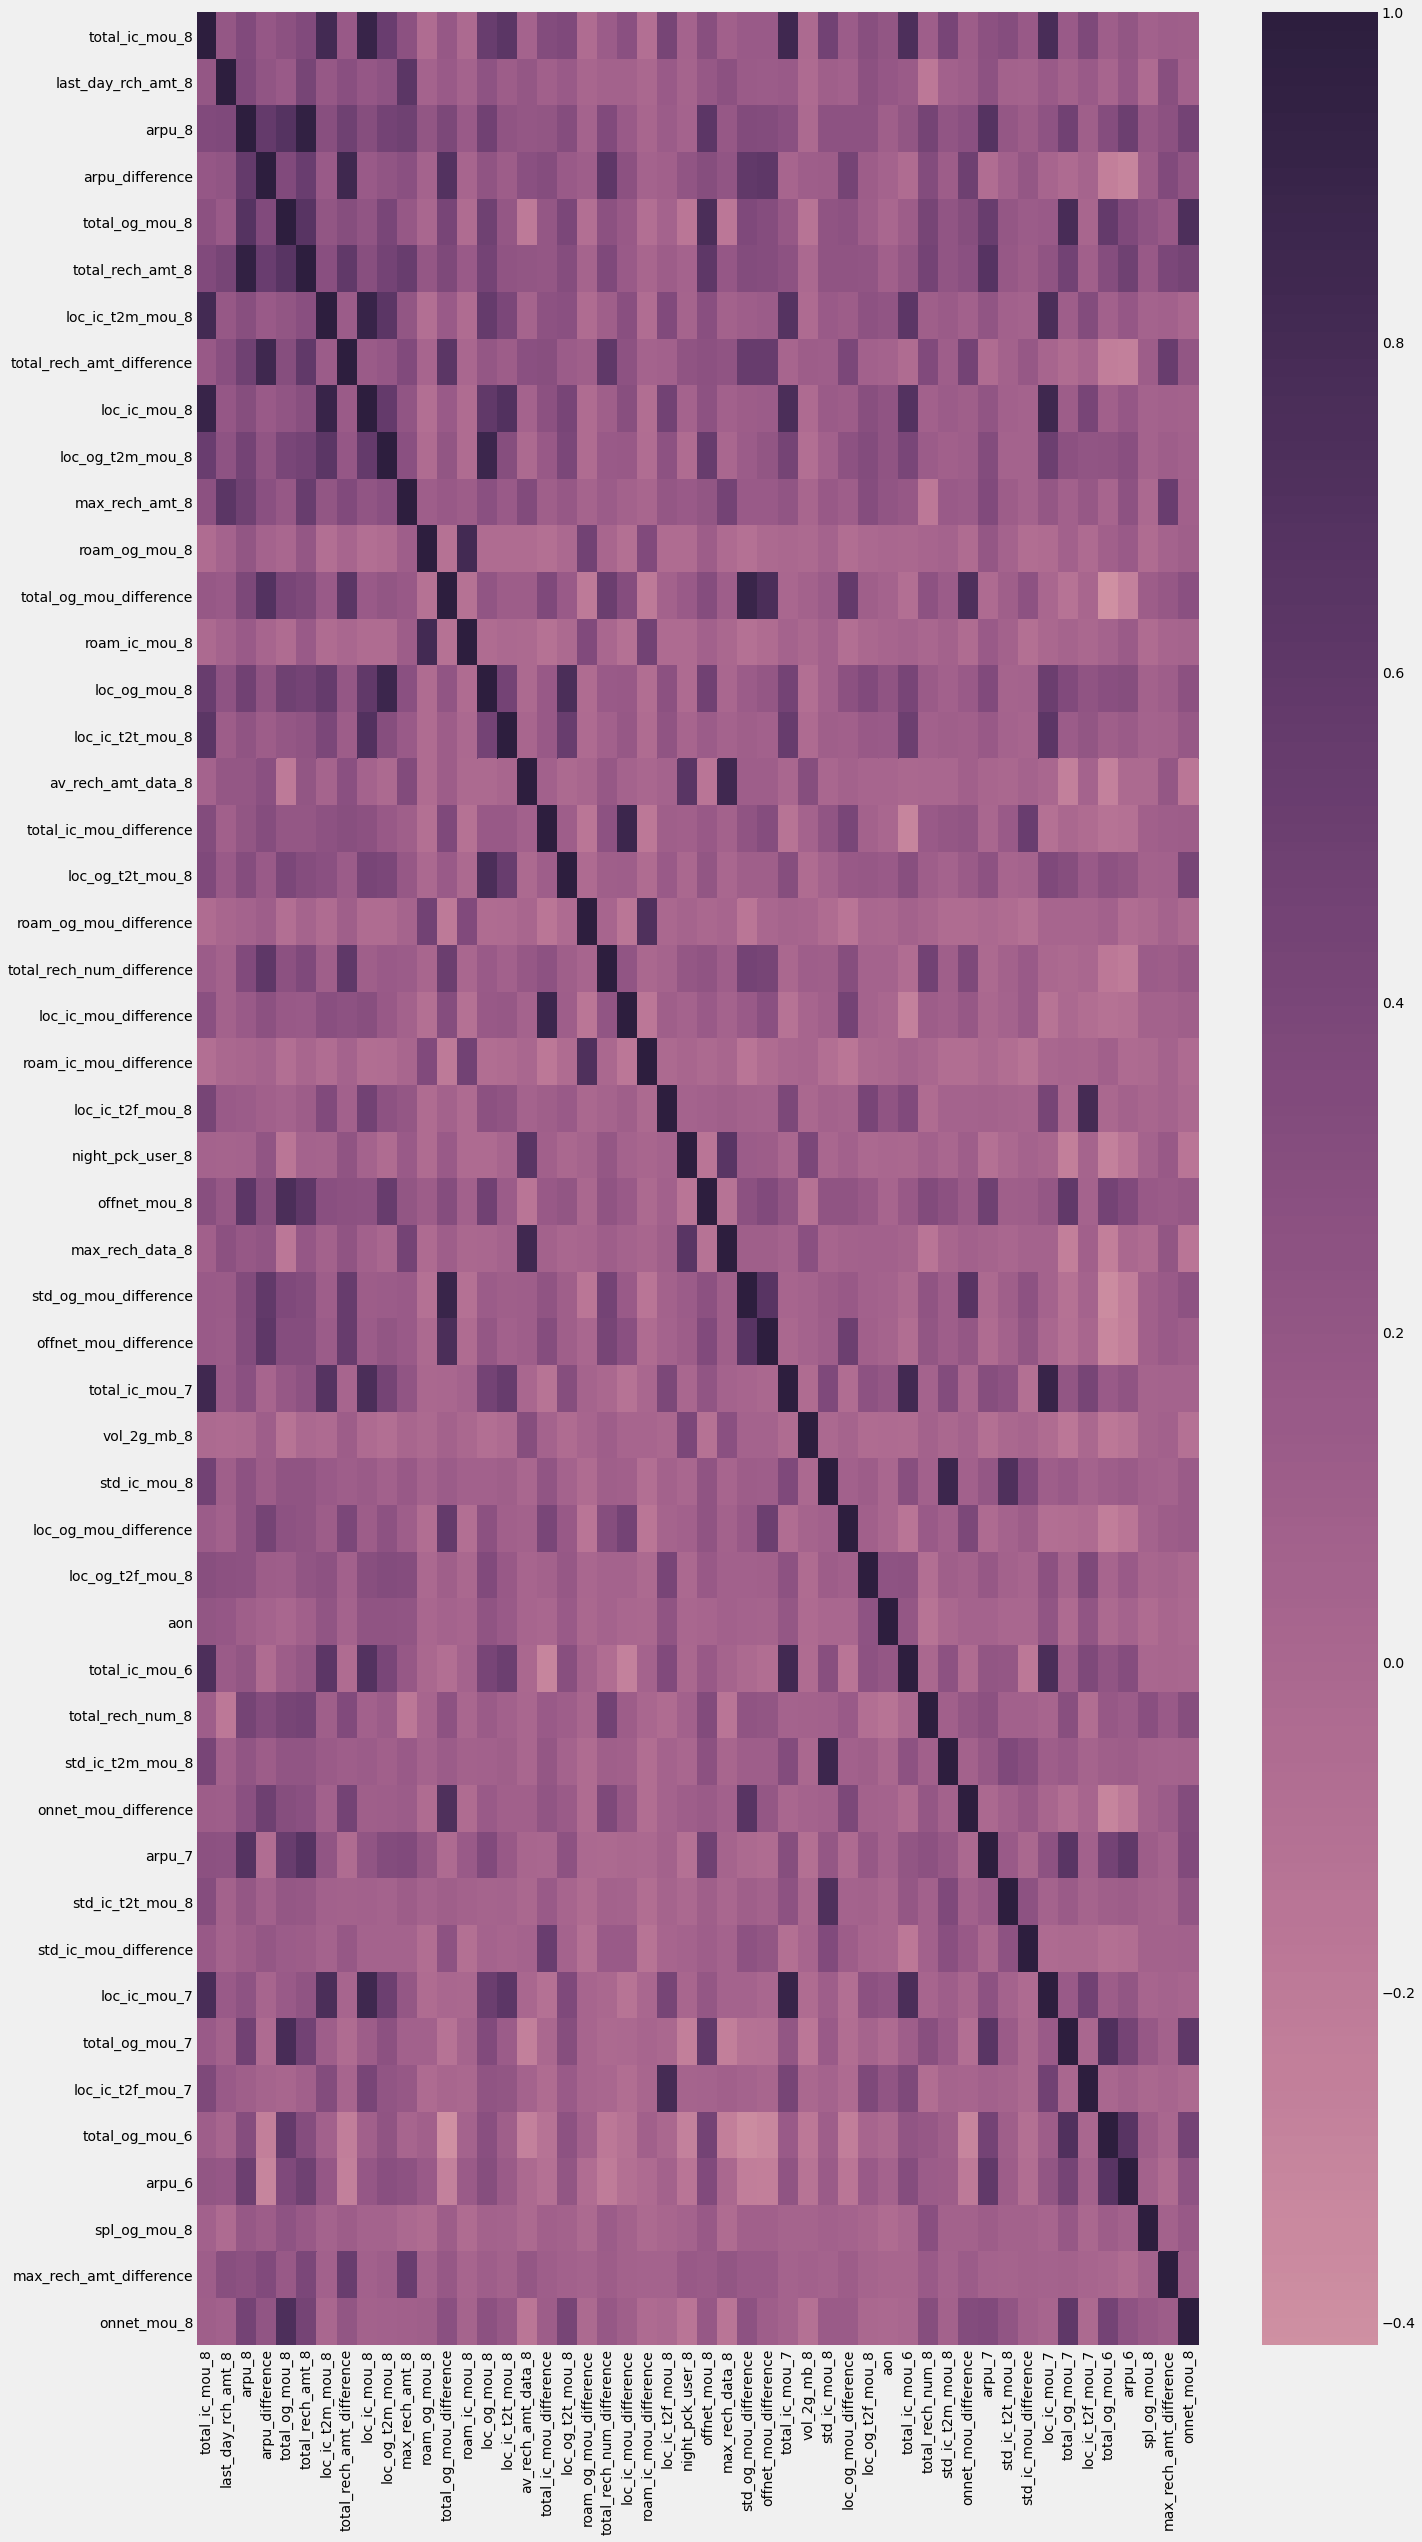

In [133]:
# plot feature correlation
plt.figure(figsize = (20,40))
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0,cmap= sns.cubehelix_palette(200))
plt.show()

In [134]:
ii=3
con_df.loc[ii,'Sl. No']=ii+1
con_df.loc[ii,'Model']="Random forest"
con_df.loc[ii,'accuracy']=metrics.accuracy_score(y_test, y_pred)
con_df.loc[ii,'precision']=metrics.precision_score(y_test, y_pred)
con_df.loc[ii,'recall']=metrics.recall_score(y_test, y_pred)
con_df.loc[ii,'hamming_loss']=metrics.hamming_loss(y_test, y_pred)
con_df.loc[ii,'log_loss']=metrics.log_loss(y_test, y_pred)
con_df.loc[ii,'zero_one_loss']=metrics.zero_one_loss(y_test, y_pred)
con_df.loc[ii,'AUC&ROC']=metrics.roc_auc_score(y_test, y_pred)
con_df.loc[ii,'matthews_corrcoef']= metrics.matthews_corrcoef(y_test, y_pred)
 
con_df

,Sl. No,Model,accuracy,precision,recall,hamming_loss,log_loss,zero_one_loss,AUC&ROC,matthews_corrcoef
0,1.0,PCA + Logistic Regression,0.819335,0.288232,0.833882,0.180665,6.240081,0.180665,0.825966,0.420019
1,2.0,PCA + Logistic Regression + Hyperparameter.,0.849780,0.328467,0.814145,0.150220,5.188534,0.150220,0.833537,0.454434
2,3.0,Support vector Machine.,0.930965,0.786164,0.205592,0.069035,2.384374,0.069035,0.600325,0.380162
3,4.0,Random forest,0.946584,0.762402,0.428781,0.053416,1.844946,0.053416,0.708912,0.547410


### Based on the above models the best model is first one i.e Logistic regression model which gives recall of 83% and ROC value of .9¶

#### Model Building for identifying important predictor attributes which help the business understand indicators of churn

In [95]:
y = df_filtered.churn
X = df_filtered.drop('churn', axis=1)
# scaling the features
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, train_size=0.7, test_size=0.3, random_state=100)

In [96]:
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 60)             # running RFE with 60 variables as output
rfe = rfe.fit(X_train, y_train)

In [97]:
rfe.support_

array([False, False, False, False, False,  True,  True, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [98]:
X_scaled_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_difference,onnet_mou_difference,offnet_mou_difference,roam_ic_mou_difference,roam_og_mou_difference,loc_og_mou_difference,std_og_mou_difference,isd_og_mou_difference,spl_og_mou_difference,total_og_mou_difference,loc_ic_mou_difference,std_ic_mou_difference,isd_ic_mou_difference,spl_ic_mou_difference,total_ic_mou_difference,total_rech_num_difference,total_rech_amt_difference,max_rech_amt_difference,total_rech_data_difference,max_rech_data_difference,av_rech_amt_data_difference,vol_2g_mb_difference,vol_3g_mb_difference
0,0.0,0.0,0.0,-0.984196,-0.931048,-0.740951,-0.567963,-0.566943,-0.615747,-0.654003,-0.659811,-0.841593,-0.295320,-0.257497,-0.261150,-0.307897,-0.285481,-0.278072,-0.462230,-0.461108,-0.541276,-0.573836,-0.587215,-0.768971,-0.428361,-0.432867,-0.430646,-0.35412,-0.347098,-0.350843,-0.585830,-0.599488,-0.784685,-0.475803,-0.477812,-0.443320,-0.505407,-0.503979,-0.482071,-0.242066,-0.235442,-0.235008,0.0,0.0,0.0,-0.607070,-0.610636,-0.577061,-0.121175,-0.121877,-0.110220,-0.485876,-0.507099,-0.496065,-0.357956,-0.047098,-0.049327,-0.966766,-0.963919,-0.884568,-0.460853,-0.463380,-0.622221,-0.516490,-0.524674,-0.822713,-0.443116,-0.437704,-0.431482,-0.521800,-0.531166,-0.860801,-0.366171,-0.364028,-0.355645,-0.436085,-0.433908,-0.452767,-0.267945,-0.271481,-0.263294,0.0,0.0,0.0,-0.444821,-0.443803,-0.499374,-0.936674,-0.943978,-0.888159,-0.430427,-0.220141,-0.278783,-0.248571,-0.257684,-0.255089,-0.209489,-0.217532,-0.217396,-0.939843,-1.029154,-0.954082,-0.664870,-0.898452,-0.692140,0.685550,0.649175,0.757286,1.509589,1.499470,1.560695,-0.246521,-0.294299,-0.217944,1.796005,1.758106,1.878894,0.770441,0.690457,0.836391,-0.342215,-0.456032,-0.399807,-0.361090,-0.281605,-0.320971,0.819877,0.808068,0.877317,-0.420246,-0.426410,-0.397656,-0.471215,-0.487004,-0.465278,1.629814,1.5

In [99]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 113),
 ('std_og_t2o_mou', False, 112),
 ('loc_ic_t2o_mou', False, 111),
 ('arpu_6', False, 96),
 ('arpu_7', False, 45),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 56),
 ('onnet_mou_8', False, 100),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 41),
 ('roam_ic_mou_7', False, 35),
 ('roam_ic_mou_8', False, 63),
 ('roam_og_mou_6', False, 86),
 ('roam_og_mou_7', False, 77),
 ('roam_og_mou_8', False, 13),
 ('loc_og_t2t_mou_6', False, 48),
 ('loc_og_t2t_mou_7', False, 47),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 104),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 89),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', False, 10),
 ('loc_og_t2c_mou_6', False, 65),
 ('loc_og_t2c_mou_7', False, 79),
 ('loc_og_t2c_mou_8', False, 40),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', False, 78),
 ('loc_og_mou_8'

In [105]:
col = X_train.columns[rfe.support_]

In [101]:
X_train.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'onnet_mou_7', 'onnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8',
       ...
       'roam_og_mou_difference', 'isd_og_mou_difference',
       'spl_og_mou_difference', 'std_ic_mou_difference',
       'isd_ic_mou_difference', 'total_rech_amt_difference',
       'max_rech_amt_difference', 'total_rech_data_difference',
       'av_rech_amt_data_difference', 'vol_3g_mb_difference'],
      dtype='object', length=112)

In [108]:
print(df_filtered[col].columns)
len(df_filtered[col].columns)

Index(['arpu_8', 'onnet_mou_6', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'og_others_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_6', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'av_rech_amt_data_7', 'night_pck_user_8',
       'monthly_2g_7', 'sachet_2g_7', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'sep_vbc_3g', 'arpu_difference', 'loc_og_mou_differe

60

### Considering The above Statistical Analysis and applying the Business Knowledge The following are identified as important variables.

ARPU 7th and 8th - Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.<br>

date_of_last_rech_8 - Most of the Users are churned between 25th to 31st of the month. Hence providing offers prior to 25th can reduce the churn. Send out periodic offers to customers between 15th of the month to 25th of the month.<br>

last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.<br>

roam_ic_mou_8 - Higher the incoming roaming amount, higher is the churn rate. Focus on customers whose incoming roaming amount has increased, because they are likely to churn.<br>

std_ic_t2f_mou_8 - Lower the STD incoming call, higher is the churn rate. Focus on customers whose STD incoming call amount has decreased for that month.<br>

max_rech_amt_8- Focus on the customer whoes Avg max recharge amount has been decreased

### Action to be taken to reduce churn¶

Special discounts may be given to thecustomers according to their usage.<br>

Additional internet services can be provided on recharge.<br>

Customers needs to be paid more attention to resovle their issues.<br>

Tariffs on data usage may be lowered for a better 2G area coverage where 3G is not available.<br>

3G network is to be expanded where 3G is currently not available.<br>